In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import loadtxt
from numpy import savetxt

# Options
pd.options.mode.chained_assignment = None

In [270]:
## Linear values from 22 to 17 and vice-versa, for the V part of the rook
def get_line(increase=True):
    increment = 0.011575
    x = np.ones(433)
    if increase:        
        x[0] = 17
        for n in range(1,433):
            x[n] = x[n-1]+increment
    else:
        x[0] = 22
        for n in range(1,433):
            x[n] = x[n-1]-increment
    return x
            
d = get_line(increase=False)
print(d[0], d[216], d[432])

22.0 19.49979999999988 16.99959999999976


25.0
50000


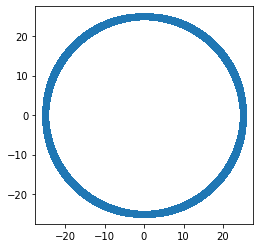

In [271]:
two_pi = 2 * math.pi

## Defines a circunference given the radius and number of points
def circle_points(r, n):
    t = np.linspace(0, two_pi, n)
    x = r * np.cos(t)
    y = r * np.sin(t)
    print(max(x))
    return np.c_[x, y]

r = 25
n = 50000

circle = circle_points(r, n)
fig, ax = plt.subplots()
print(len(circle))

## Plot
ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')

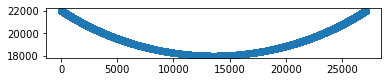

In [272]:
# Put the points on a dataframe
df = pd.DataFrame({'x':circle[:, 0], 'y':circle[:, 1]})

# Cutting top 4 cm (22-18)
p = df.query("y <= -21")

# After the cut the values are from 21 to 25, so subtracting 3 gives the target interval (18-22)
# Add 40 to normalize the values in a better range
p['x'] = p['x']+3+40
p['y'] = p['y']+3+40
p = p.reset_index().reset_index()

# Scale the values for binning
s = 1000
p['y_test'] = (p['y']*s)
p['x_test'] = ((p['x']-p['x'].min())*s).astype(int)

# Current result - not same target numbers yet but equivalent proportion
fig, ax = plt.subplots()
ax.scatter(p['x_test'],p['y_test'])
ax.set_aspect('equal')


0
27127
9128
9128


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


                     index          y
bin                                  
(13549.66, 13563.5]    980  18.000001
                        index          y
bin                                     
(6518.784, 6532.624]      472  19.010967
(20594.376, 20608.216]   1489  19.011409
                        index          y
bin                                     
(5134.754, 5148.594]      372  19.461324
(21978.406, 21992.246]   1589  19.461853


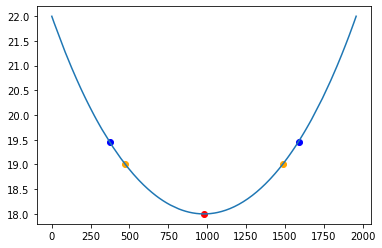

In [281]:
print(p['x_test'].min())
print(p['x_test'].max())
print(len(p['x_test']))
print(len(p.groupby('x_test').median()))


# Binning the values in 1960 measurements (since the length of curvy part is 19.6 cm)
p['bin'] = pd.cut(p['x_test'], 1960)
test = p.groupby('bin').median().fillna(method='ffill')
test['index'] = (range(1, len(test) + 1))

# Testing values given on the drawing
# Target - 980
plt.plot(test['y'])
sub = test.query('y>17.999999 and y<18.000001')
plt.scatter(sub['index'], sub['y'], color='red')
print(sub[['index','y']])

# Target - 480 and 1480
sub = test.query('y>19.009 and y<19.012')
plt.scatter(sub['index'], sub['y'], color='orange')
print(sub[['index','y']])

# Target - 380 and 1580
sub = test.query('y>19.459 and y<19.462')
plt.scatter(sub['index'], sub['y'], color='blue')

print(sub[['index','y']])
plt.show()


1960
middle     [18.00]:  18.000001048687405
middle-500 [19.01]:  18.974591336147213
middle+600 [19.46]:  19.42189675264749
5001


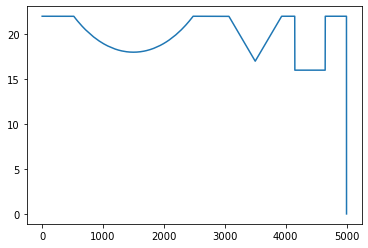

In [278]:
# Building the rook from right to left of engineering drawing
print(len(test))
rescale = len(test)/1960

a = np.full(int(350 * rescale), 22) 
b = np.full(int(500 * rescale), 16)
c = np.full(int(217 * rescale), 22)
d = get_line(increase=True) 
e = get_line(increase=False) 
f = np.full(587, 22)

# curve
g = test['y'].to_numpy().flatten()
print("middle     [18.00]: ", g[int(980 * rescale)])
print("middle-500 [19.01]: ", g[int((980-500) * rescale)])
print("middle+600 [19.46]: ", g[int((980+600) * rescale)])

h = np.full(int(520 * rescale), 22)

res = np.append(h,g)
res = np.append(res, f)
res = np.append(res, e)
res = np.append(res, d)
res = np.append(res, c)
res = np.append(res, b)
res = np.append(res, a)
res = np.append(res, [0])

print(len(res))
plt.plot(res);

                        

In [259]:
## Save to file
savetxt('model.csv', res, delimiter=',')

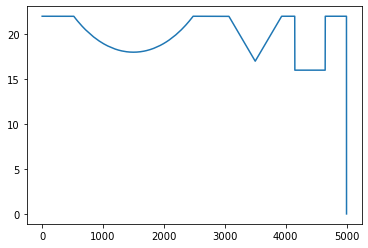

In [280]:
## Load from file
data = loadtxt('model.csv', delimiter=',')
plt.plot(data);